# Assignment 2, group 28
Amanda Allgurén, Albin Jansfelt & Lukas Martinsson


## Step 1. Reading the data

In [ ]:
import pandas as pd

df_train = pd.read_csv("adult_train.csv")
df_test = pd.read_csv("adult_test.csv")

#Splitting data into X,Y sets
X_train = df_train.loc[:, df_train.columns!='target']
Y_train = df_train['target']
X_test = df_test.loc[:, df_test.columns!='target']
Y_test = df_test['target']

Training and test datasets are split into input and output set, where the columns 'target' previously stored the class of each instance.

## Step 2: Encoding the features as numbers.

In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train_dict = X_train.to_dict('records')
X_test_dict = X_test.to_dict('records')

dv = DictVectorizer()

X_train_encoded = dv.fit_transform(X_train_dict)

#Computing accuracy
clf = RandomForestClassifier(random_state=0)
score_randomForest = np.mean(cross_val_score(clf, X_train_encoded, Y_train))
score_randomForest


0.8467491260155932

In [ ]:
from sklearn.metrics import accuracy_score
X_test_encoded = dv.transform(X_test_dict)
clf.fit(X_train_encoded, Y_train)
Yguess = clf.predict(X_test_encoded)
print(accuracy_score(Y_test, Yguess))


0.8456483017013697


In the code blocks above, the traning and test set are stored as a dictionary for the DictVectorizer to be applied on the data. Using one-hot encoding, the observed values of each feature present is stored in the dataset. The DictVectorizer is fitted on the x_train_dict data and then cross-validated using a RandomForestClassifier.

The RandomForest classifier was selected (since it showed great accuracy in Assignment 1) and this is trained on the x_train_encoded data and then predicted on the x_test_encoded data. The accuracy for the prediction on the training data is 0.8456. 

## Step 3. Combining the steps.

In [ ]:
from sklearn.pipeline import make_pipeline

# Creating the pipeline, using the same seed as before to validate
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier(random_state=0)
)

pipeline.fit(X_train_dict, Y_train)
Yguess = pipeline.predict(X_test_dict)
print(accuracy_score(Y_test, Yguess))

0.8456483017013697


The above result 0.8456 from the pipeline is the same as the previous result without the pipeline. 

## Task 2: Decision trees and random forests

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
score_decisionTree = np.mean(cross_val_score(clf, X_train_encoded, Y_train))
score_decisionTree

0.8179724514305352

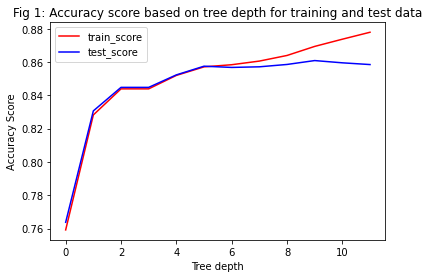

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_score = []
test_score = []

max_depths = range(1,13)
for max_depth in max_depths:
    clf = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    clf.fit(X_train_encoded,Y_train)
    
    YpredictTest = clf.predict(X_test_encoded)
    YpredictTrain = clf.predict(X_train_encoded)

    train_score.append(accuracy_score(Y_train, YpredictTrain))
    test_score.append(accuracy_score(Y_test, YpredictTest))

plt.plot(train_score, color = 'red', label='train_score')
plt.plot(test_score, color = 'blue', label='test_score')

plt.ylabel('Accuracy Score')
plt.xlabel('Tree depth')
plt.title('Fig 1: Accuracy score based on tree depth for training and test data')
plt.legend()
plt.show()

We see from Figure 1 that when tree depth is greater than 5 we have overfitting. The model performs even better on the training data but not on the test data. This is due to the model considering too much of the details in the training data to be generalizable on data not yet exposed to.

When tree depth = 5 we seem to have the best test_score in comparison to train_score.

Further, when tree depth is less than 5 the accuracy score has not reached its optimum, but test_score and train_score follow each other closely. We see here that we have underfitting.

In comparison with assignment 1 we see similar effects with overfitting. However, before the accuracy has reached its optimum we dont see a noticeable difference between test_score and train_score. But we still have underfitting as in previous assignment.

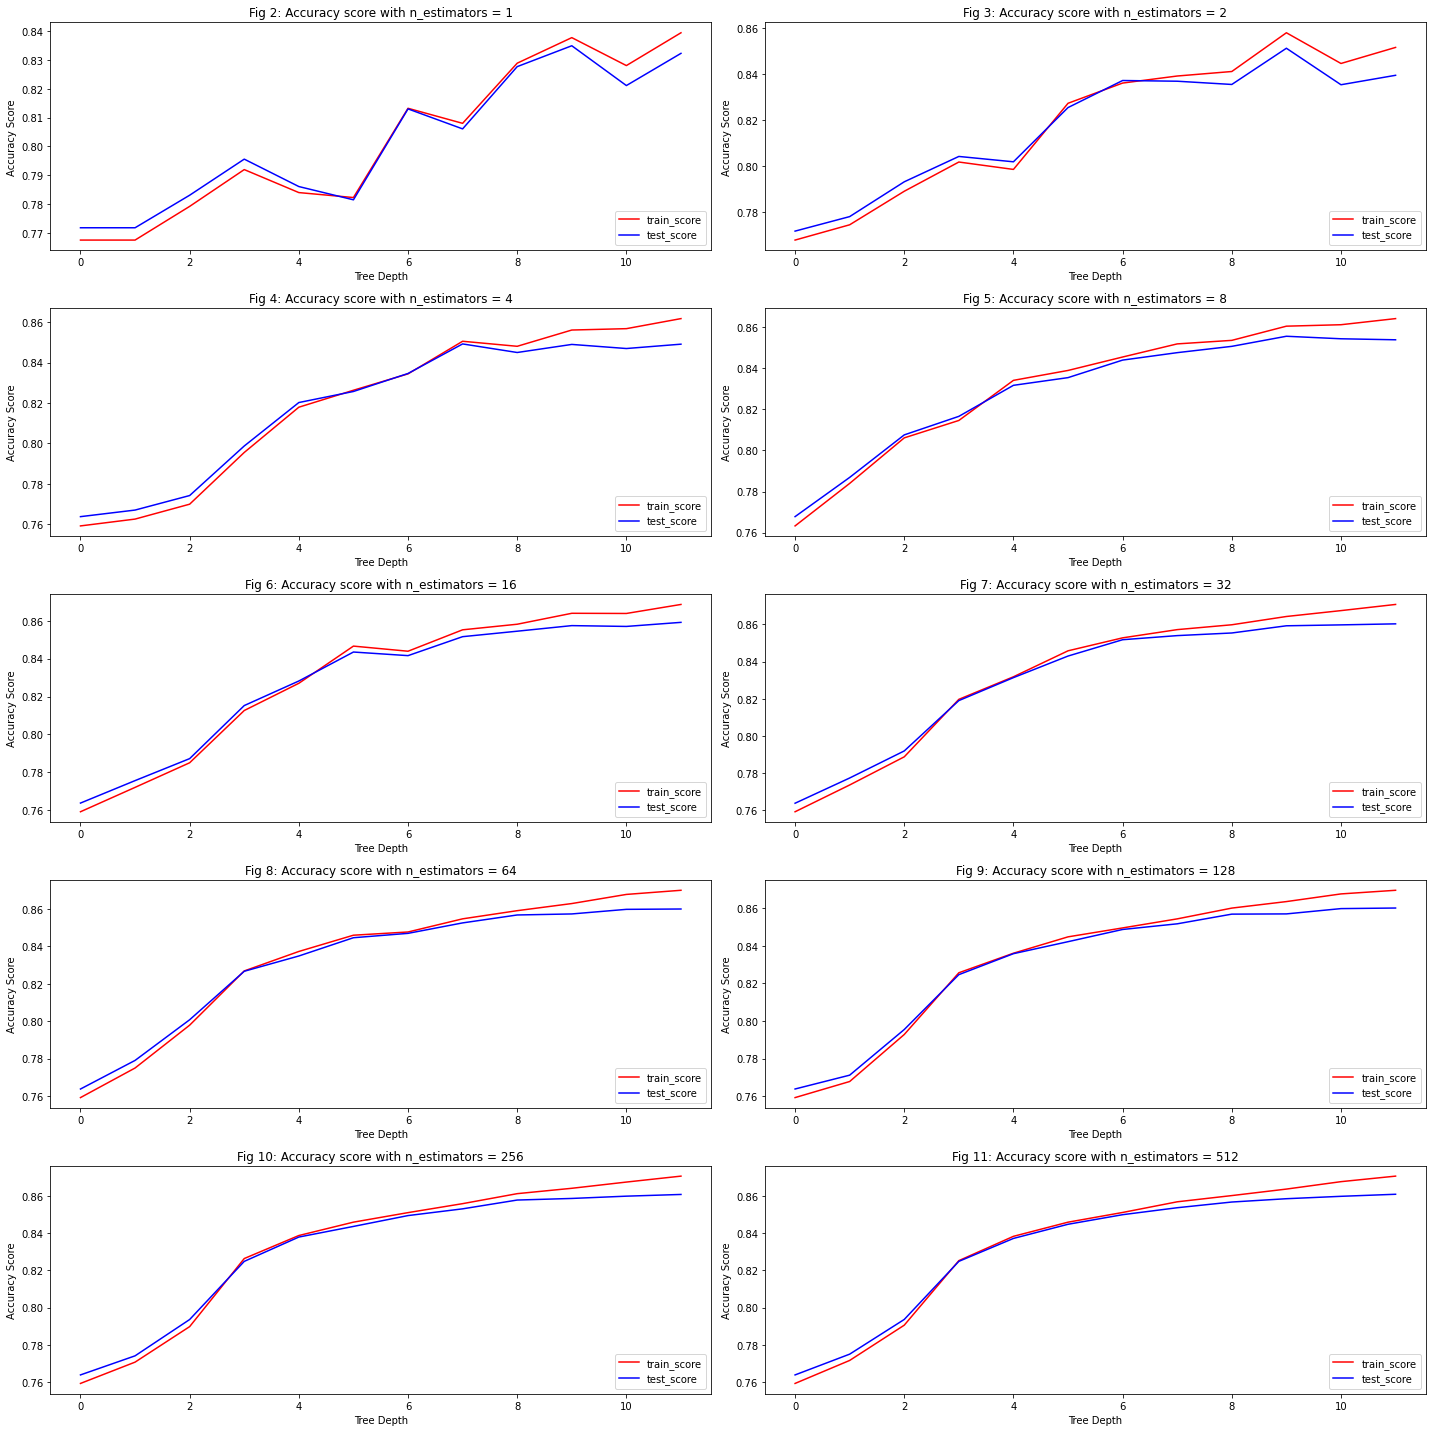

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import time

#ns = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
ns = [1,2,4,8,16,32,64,128, 256, 512] 
max_depths = range(1,13)

fig, axs = plt.subplots(len(ns)//2,2, sharex = False, sharey = False)
total_test_score = [0]*len(ns)

total_times = [0]*len(ns)

for i in range(len(ns)):
    n = ns[i]
    train_score = []
    test_score = []
    times = []

    for max_depth in max_depths:
        clf = RandomForestClassifier(random_state=0, max_depth=max_depth, n_estimators = n, n_jobs=-1)
        
        start_time = time.time()
        clf.fit(X_train_encoded,Y_train)
        times.append(time.time() - start_time)

        YpredictTest = clf.predict(X_test_encoded)
        YpredictTrain = clf.predict(X_train_encoded)

        train_score.append(accuracy_score(Y_train, YpredictTrain))
        test_score.append(accuracy_score(Y_test, YpredictTest))

    axs[i//2,i%2].plot(train_score, color='red', label='train_score')
    axs[i//2,i%2].plot(test_score, color='blue', label='test_score')
    axs[i//2,i%2].set(xlabel = 'Tree Depth', ylabel = 'Accuracy Score',title = 'Fig ' + str(i+2) + ': Accuracy score with n_estimators = ' + str(n))
    axs[i//2,i%2].legend(loc='lower right')

    total_test_score[i] = np.max(test_score)
    total_times[i] = np.sum(times)

    fig.set_figwidth(20)
    fig.set_figheight(20)
    
fig.tight_layout()
plt.show()

- What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference? <br>
Comparing Figure 1 and Figure 2, it can be observed that the accuracy is greater for a single decision tree instead of a random forest with only one tree. A decision tree consider all the avaliable features and places the most important as the root node and works its way down recursively. A random forest however, consider only a subset of the avaliable features to build the decision tree. This works well as the ensamble of trees grows, each considering somewhat different features, but for a single tree the accuracy is affected negatively. Another difference that can be observed is that Figure 2 shows a jagged curve, where the accuracy is sometimes improved and sometimes worsen. This is also caused by the fact that it is a random subset of features that are considered at each model fitting. Features that where shown important for prediction at depth 3 may not be used when evaluating the score for depth 4. The decision tree classifier shows a more even increase in accuracy since all the features have been considered.


- What happens with the curve for random forests as the ensemble size grows? <br>
Visually, we can see that the curve gets more "smooth" when the ensemble sice grows. Since the RandomForest utilized a random set of features for each tree in its ensamble, the curve for a random forest with a larger set of estimators will fluctuate less, since each tree will average out the result of the forest. Since the average of all trees in the forest will be considered, a greater number of trees will also result in more accurate predictions for smaller tree depths. For larger tree depths, there are less differences in the accuracy score for small or large number of n_estimator. Each tree is considering a greater number of features and can improve the accuracy (especially of the training data) by its own. However, what can be observed for all n_estimator figures above is that there will be overfitting when tree size grow too large. 

- What happens with the best observed test set accuracy as the ensemble size grows? <br>
A greater ensamble size means more decision trees trained on the data, and does therefore improve accuracy. The fact that they are all trained on a different subset of features prevents it from overfitting. Since each individual tree in the forest will have a less impact on the accuracy score as the ensamble grows, the impact of which subset of features was selected in each tree will be decreased and result in less fluctuation of accuracy, hence the accuracy score at some value should stabilize when n_estimators is large enough which is shown in Fig 14. 

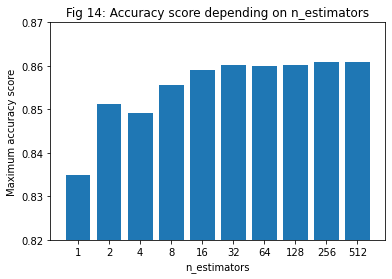

In [ ]:
string_ints = [str(int) for int in ns]
plt.bar(string_ints, total_test_score, align='center')
plt.xlabel("n_estimators")
plt.ylabel("Maximum accuracy score")
plt.ylim(0.82,0.87)
plt.title("Fig 14: Accuracy score depending on n_estimators")
plt.show()

print("Maximum accuracy score obtained:", np.max(total_test_score))
print("n_estimators where maximum accuracy score was obtained:", ns[np.argmax(total_test_score)])


- What happens with the training time as the ensemble size grows?

To capture this effect we observed the time when fitting the training data. Since we also tried 12 different max_depths, the time was summed for all different max_depths. The trend would be the same if we would average instead of sum the twelve different training-times.

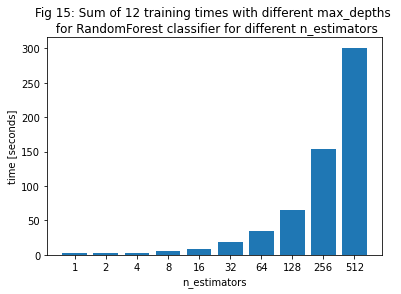

In [ ]:
string_ints = [str(int) for int in ns]
plt.bar(string_ints, total_times, align='center')
plt.xlabel("n_estimators")
plt.ylabel("time [seconds]")
plt.title("Fig 15: Sum of 12 training times with different max_depths \n for RandomForest classifier for different n_estimators")
plt.show()


As we can see in Figure 15 the time is exponentially increasing in the bar chart. But since the n_estimators was increased exponentially as well it mean that the time is increasing linearly when increasing the n_estimators. This is reasonable, since we just increase the number of trees linearly in our forest. For example, if the time for training 1 decision tree is $0.5$ seconds, then the time to train 4 trees is $0.5*4 = 2$ seconds, and 128 trees is $0.5*128 = 64$ seconds.

Finally, we see that it may not be adviseable to increase the number of n_estimators for RandomForests. Figure 14 shows that the accuracy stabilizes around n_estimators = 32 and Figure 15 shows that the time increases linearly with number of n_estimators. Thus, it would be adivseable to try to find the lowest n_estimators where the accuracy has stabilizied. For example, you can stop the increasing of n_estimators once the accuracy difference is under a certain threshold. 

### Task 3: Feature importances in random forest classifiers

Maximum accuracy score obtained: 0.8610036238560285
n_estimators where maximum accuracy score was obtained: 512


<AxesSubplot:title={'center':'Figure 17: The 10 features with the highest importance score for RandomForest'}>

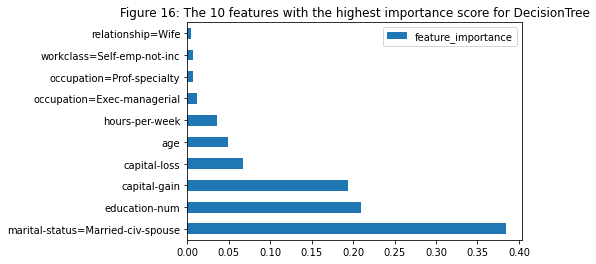

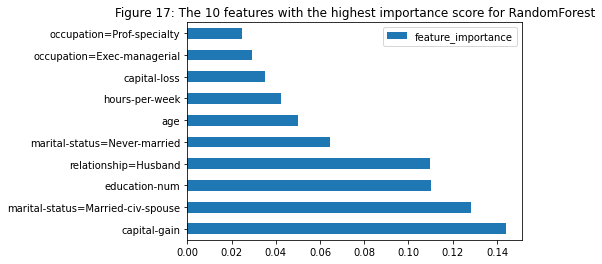

In [ ]:
clf = DecisionTreeClassifier(random_state=0, max_depth=10)
clf.fit(X_train_encoded,Y_train)
imp_scores = clf.feature_importances_
feature_names = dv.feature_names_

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(X_train_dict)

df = pd.DataFrame({'feature_importance': imp_scores}, index = feature_names)

df_sorted = df.sort_values(by=['feature_importance'], ascending=False)
df_sorted.head(10).plot.barh(title = 'Figure 16: The 10 features with the highest importance score for DecisionTree')


clf = RandomForestClassifier(random_state=0, max_depth=10)
clf.fit(X_train_encoded,Y_train)
imp_scores = clf.feature_importances_
feature_names = dv.feature_names_

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(X_train_dict)

df = pd.DataFrame({'feature_importance': imp_scores}, index = feature_names)

df_sorted = df.sort_values(by=['feature_importance'], ascending=False)
df_sorted.head(10).plot.barh(title = 'Figure 17: The 10 features with the highest importance score for RandomForest')


-  Inspect the first few of these features, and try to reason about why you got this result. 

As the two figures above demonstrate, there is a difference in importance of the features depending on the classifier. One reason for this could be that in the DecisionTreeClassifier, every feature's importance can not be calculated properly on its individual level. If two features are very similar, and one is somewhat more important, the other feature will be considered useless since it will not split the data effienctly if the other feature has already been considered. This could be the reason as to why RandomTreeClassifier gives a different result since not all features are considered in each tree.

Looking at some of the features with the highest importance score in Figure 16 and 17, we can see which features are separating the data the most efficient but cannot for sure say if the feature status is contributing to the higher or lower salary. We can find 'age' as one of the 10 most important features. That this feature is important could also be said intuitively since the salary is often raised every year and someone of a higher age is most definitely making more money than his/her younger self (even if excluding factors like inflation rate). Hours per week is also a feature of importance which can be explained by that the more hours you work, the more money you make (in general). Lastly the feature with the highest importance score in fig 17 is capital gain. Depending on how the data set defines "earns" more then 50,000\$ the explanation can vary slightly. If it is only based on salary then one can argue that a high capital gain can be the result of for example selling an expensive house, which one is more likely to do if one has a higher salary, since it implies a higher probablility of being able to afford a more expensive house. If capital gain is included in "earns" then the explanation becomes trivial, higher capital gain results in the goal of reaching >50.000\$  that much close.

-  Alternative way to compute some sort of importance score of individual features.

An alternative way which is described in Parr et. al (2018) is "Drop-column Importance". The method follows that we first calculate a baseline performance score with for example a validation set. We then drop one column (which correspond to one feature), re-train the model and calculate new performance score. The importance value of the dropped feature is then the difference between the baseline and the new performance score. Further, this scores would answer the question in how the dropped feature affect the overall performance.

The authors argues that this method would be standard in all RandomForests implementations if computational power was not a limiting factor. This is however its weakness. By dropping one column at the time and re-training the model, this can take a very long time.


In [ ]:
print(imp_scores)
print(feature_names)

[5.02567786e-02 1.44166561e-01 3.51648056e-02 1.09995712e-01
 1.28241256e-03 1.73348966e-03 1.97489520e-04 1.51567311e-04
 6.45128821e-04 2.08622715e-03 9.04414953e-04 6.02914806e-04
 9.18738202e-04 2.31259628e-02 6.51384722e-03 1.07450005e-02
 1.36811681e-02 4.87281646e-05 1.17392611e-02 2.75141719e-03
 4.25520109e-02 8.74482370e-03 2.34342982e-04 1.28241392e-01
 3.63593155e-04 6.44699450e-02 1.31528197e-03 9.98958355e-04
 6.06702106e-04 8.99018054e-05 2.95345780e-04 2.47196227e-04
 3.04775316e-05 1.34124170e-04 7.69125641e-05 6.50598100e-05
 7.91678154e-05 3.22497050e-04 1.09576072e-04 2.80872214e-04
 1.40984432e-04 5.36496918e-05 7.70452667e-05 9.80637480e-07
 8.99466481e-06 6.06622971e-05 6.92367469e-05 3.78555345e-04
 1.33719520e-04 6.00855839e-05 2.40815051e-04 1.47293310e-04
 2.70172652e-04 2.86366897e-05 1.59910420e-03 1.77716978e-05
 1.39220441e-05 7.44610993e-06 2.69555213e-04 1.44985754e-04
 1.14241950e-04 1.44477607e-04 1.49978979e-05 3.40503102e-04
 1.62577459e-04 1.338607

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89b01b9f-61eb-4ced-b430-5e8271ccf879' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>